In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
data = {
    'Text': [
        "This is a great movie with fantastic storyline",
        "Horrible experience, the worst movie ever",
        "Amazing acting and cinematography, loved it",
        "Terrible plot and bad screenplay",
        "I enjoyed the movie, great visuals",
        "Not recommended, very disappointing",
        "Brilliant performance by the lead actor",
        "Awful movie, waste of time",
        "Must watch, incredible direction",
        "Bad script, boring experience"
    ],
    'Category': ['Positive', 'Negative', 'Positive', 'Negative', 'Positive',
                 'Negative', 'Positive', 'Negative', 'Positive', 'Negative']
}

df = pd.DataFrame(data)
df

,Text,Category
0,This is a great movie with fantastic storyline,Positive
1,"Horrible experience, the worst movie ever",Negative
2,"Amazing acting and cinematography, loved it",Positive
3,Terrible plot and bad screenplay,Negative
4,"I enjoyed the movie, great visuals",Positive
5,"Not recommended, very disappointing",Negative
6,Brilliant performance by the lead actor,Positive
7,"Awful movie, waste of time",Negative
8,"Must watch, incredible direction",Positive
9,"Bad script, boring experience",Negative


In [18]:
df['Label'] = df['Category'].map({'Positive': 1, 'Negative': 0})
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.2, random_state=42)

In [19]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [20]:
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}\n")
print("classification_report\n", classification_report(y_test, y_pred))

Accuracy : 0.50

classification_report
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\vijay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vijay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vijay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

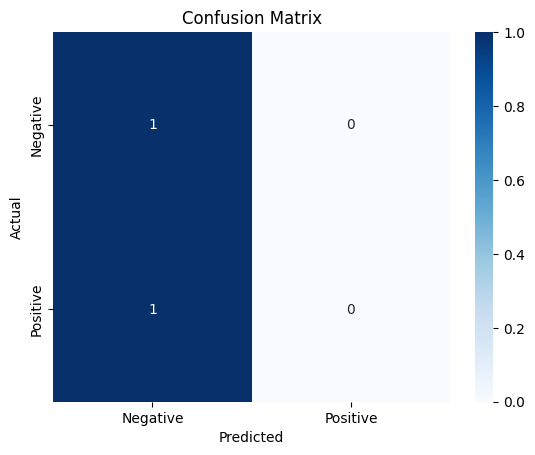

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()